In [ ]:
# import packages
import pandas as pd
import numpy as np

# import Decision Tree classifier model, Multinomial Naive Bayes model, Logistic Regression classifier model, k-nearest Neighbors classifier model from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

# import functions
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import evaluation tools
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.metrics import recall_score,precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import auc

# import libraries to create plots and visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Preparation

## Data Understanding

### Dataset Description

In [ ]:
# use this code if read the data set from the local drive
# raw_data = pd.read_csv('brfss2020.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
raw_data = pd.read_csv('/content/drive/MyDrive/ISOM3360 Group Project/brfss2020.csv')

In [ ]:
# create new dataset to do data cleaning
data = raw_data.copy()

In [ ]:
# figure out the number of records and features
data.shape

(401958, 279)

### Label Determination

In [ ]:
# set the target 
target = '_MICHD'

In [ ]:
# detect the number of missing values for the target
data[target].isnull().sum()

3571

In [ ]:
# drop the examples with the null for target varibale
data.dropna(subset=['_MICHD'], inplace=True)
data[target].isnull().sum()

0

In [ ]:
# replace the value of 2 which means did not report having disease with 0
data[target].replace(to_replace=2, value=0, inplace=True)

###  Feature Selection

In [ ]:
# compute the percentage of nulls for each feature
isnull_percentage = data.isnull().sum()/len(data)

In [ ]:
# generate the list of features with the percentage of nulls that is greater than 90%
variables = list(data.columns)
isnull_percentage_greater_90 = []
for i in range(0,len(isnull_percentage)):
    if isnull_percentage[i] > 0.9:
        isnull_percentage_greater_90.append(variables[i])

In [ ]:
# select irrelated and repeated variables manually
irrelated_variables = ['FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE', 'SEQNO', '_PSU', 'CTELENM1', 'STATERE1', 'CELPHONE', 'LADULT1', 'LANDSEX', 
                'RESPSLCT', 'SAFETIME', 'CTELNUM1', 'CELLFON5', 'CADULT1', 'CELLSEX', 'PVTRESD3', 'CSTATE1', 'LANDLINE', 'HHADULT', 'CVDINFR4', 'CVDCRHD4',
                'NUMHHOL3', 'CPDEMO1B', 'WEIGHT2', 'STOPSMK2', 'ALCDAY5', 'DRNK3GE5', 'FALLINJ4', 'FLSHTMY3', 'LASTSMK2', 'SMOKE100', 'SMOKDAY2', 'HOWLONG', 
                'LASTPAP2', 'HPLSTTST', 'PSATIME', 'COLNTEST', 'PCPSAAD3', 'PCPSADI1', 'PCPSARE1', 'PCPSARS1', 'HEIGHT3', 'SEATBELT', 'DIFFDRES', 'HIVTSTD3', 
                'HIVRISK5', 'BIRTHSEX', 'SOMALE', 'SOFEMALE', 'TRNSGNDR', 'RCSGENDR', 'RCSRLTN2', 'CASTHDX2', 'QSTVER', 'QSTLANG', 'MSCODE', '_STSTR', '_STRWT', 
                '_RAWRAKE', '_WT2RAKE', '_IMPRACE', '_CHISPNC', '_CRACE1', '_CPRACE', '_CLLCPWT', '_DUALUSE', '_DUALCOR', '_LLCPWT2', '_LLCPWT', '_ASTHMS1', 
                '_DENVST3', '_MRACE1', '_HISPANC', '_RACE', '_RACEG21', '_RACEGR3', '_RACEPRV', '_AGEG5YR', '_AGE65YR', '_AGE_G', 'HTIN4', '_BMI5', '_RFBMI5', 
                '_RFSMOK3', 'DROCDY3_', '_RFBING5', '_DRNKWK1', '_RFDRHV7', '_RFSEAT2', '_RFSEAT3', '_DRNKDRV', '_RFMAM22', '_MAM5023', '_RFPAP35', '_RFPSA23', 
                '_CLNSCPY', '_SGMSCPY', '_SGMS10Y', '_RFBLDS4', '_STOLDNA', '_VIRCOLN', '_SBONTIM', '_AIDTST4', '_EXTETH3', '_ALTETH3', '_SEX', '_CHLDCNT', '_EDUCAG', 
                '_INCOMG', 'DRNKANY5', '_FLSHOT7']

In [ ]:
# drop these features
dropped_list = isnull_percentage_greater_90 + irrelated_variables
data = data.drop(columns = dropped_list)

### Data Visualization

In [ ]:
data[target].value_counts()

0.0    364224
1.0     34163
Name: _MICHD, dtype: int64

In [ ]:
# calculate the percentage of 0 and 1 for the label
percentage_of_1 = data[target].value_counts()[1]/len(data[target])
percentage_of_0= data[target].value_counts()[0]/len(data[target])
print(f'The percentage of individuals who have been diagnosed with heart disease {percentage_of_1}')
print(f'The percentage of individuals who have not been diagnosed with heart disease {percentage_of_0}')

The percentage of individuals who have been diagnosed with heart disease 0.0857533001829879
The percentage of individuals who have not been diagnosed with heart disease 0.9142466998170121


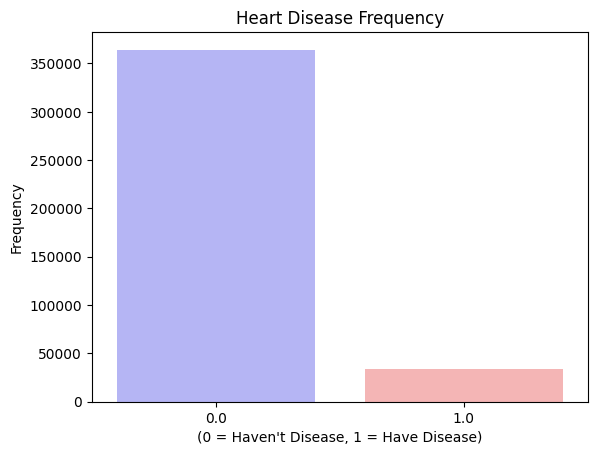

In [ ]:
sns.countplot(x="_MICHD", data=data, palette="bwr")
plt.title('Heart Disease Frequency')
plt.xlabel('(0 = Haven\'t Disease, 1 = Have Disease)')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

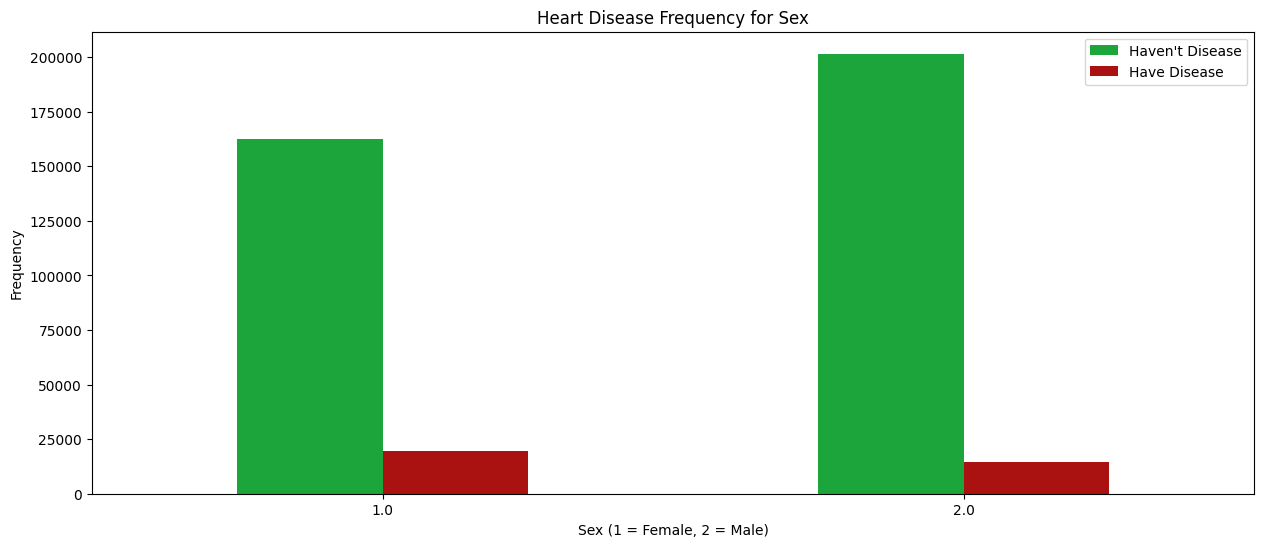

In [ ]:
#sex
pd.crosstab(data.SEXVAR,data._MICHD).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (1 = Female, 2 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

## Data Preprocessing

### Categorical and Numerical Variables

In [ ]:
# handle categorical variable
categorical_list = ['_STATE','PVTRESD1','SEXVAR','GENHLTH','HLTHPLN1','PERSDOC2','MEDCOST','CHECKUP1','EXERANY2','CVDSTRK3',
                    'ASTHMA3','ASTHNOW','CHCSCNCR','CHCOCNCR','CHCCOPD2','HAVARTH4','ADDEPEV3','CHCKDNY2','DIABETE4','LASTDEN4',
                    'RMVTETH4','MARITAL','EDUCA','RENTHOM1','VETERAN3','DEAF','BLIND','DECIDE','DIFFWALK','DIFFALON','USENOW3',
                    'FLUSHOT7','PNEUVAC4','PREGNANT','HADMAM','HADPAP2','HPVTEST','HADHYST2','PSATEST1','COLNSCPY','SIGMSCPY',
                    'BLDSTOL1','SHINGLE2','LSTBLDS4','STOOLDNA','VIRCOLON','HIVTST7','PDIABTST','PREDIAB1','CIMEMLOS','ECIGARET',
                    'ECIGNOW','ACEDEPRS','ACEDRINK','ACEDRUGS','ACEPRISN','ACEDIVRC','ACEPUNCH','ACEHURT1','ACESWEAR','ACETOUCH',
                    'ACETTHEM','ACEHVSEX','_METSTAT','_URBSTAT','_RFHLTH','_PHYS14D','_MENT14D','_HCVU651','_TOTINDA','_LTASTH1',
                    '_CASTHM1','_DRDXAR2','_BMI5CAT','_SMOKER3','_PNEUMO3','_CRCREC1','_PRACE1','EMPLOY1','INCOME2']

# mark the value of 7,9,77,99 as missing value
categorical_list1 = ['_STATE','PVTRESD1','SEXVAR','GENHLTH','HLTHPLN1','PERSDOC2','MEDCOST','CHECKUP1','EXERANY2',
                    'CVDSTRK3','ASTHMA3','ASTHNOW','CHCSCNCR','CHCOCNCR','CHCCOPD2','HAVARTH4','ADDEPEV3','CHCKDNY2',
                    'DIABETE4','LASTDEN4','RMVTETH4','MARITAL','EDUCA','RENTHOM1','VETERAN3','DEAF',
                    'BLIND','DECIDE','DIFFWALK','DIFFALON','USENOW3','FLUSHOT7','PNEUVAC4','PREGNANT','HADMAM','HADPAP2',
                    'HPVTEST','HADHYST2','PSATEST1','COLNSCPY','SIGMSCPY','BLDSTOL1','SHINGLE2','LSTBLDS4', 'STOOLDNA', 
                    'VIRCOLON', 'HIVTST7', 'PDIABTST', 'PREDIAB1', 'CIMEMLOS','ECIGARET', 'ECIGNOW', 'ACEDEPRS', 'ACEDRINK', 
                    'ACEDRUGS', 'ACEPRISN', 'ACEDIVRC', 'ACEPUNCH', 'ACEHURT1', 'ACESWEAR', 'ACETOUCH', 'ACETTHEM', 'ACEHVSEX', 
                    '_METSTAT', '_URBSTAT', '_RFHLTH', '_PHYS14D', '_MENT14D', '_HCVU651', '_TOTINDA', '_LTASTH1', 
                    '_CASTHM1', '_DRDXAR2', '_BMI5CAT', '_SMOKER3', '_PNEUMO3', '_CRCREC1']

for categorical_feature1 in categorical_list1:
    mode = data[categorical_feature1].mode()[0]
    data[categorical_feature1].replace(to_replace=7, value=mode, inplace=True)
    data[categorical_feature1].replace(to_replace=77, value=mode, inplace=True)
    data[categorical_feature1].replace(to_replace=9, value=mode, inplace=True)
    data[categorical_feature1].replace(to_replace=99, value=mode, inplace=True)
    
# mark the value of 9,77,99 as missing value
categorical_list2 = ['_PRACE1', 'EMPLOY1','INCOME2']

for categorical_feature2 in categorical_list2:
    mode = data[categorical_feature2].mode()[0]
    data[categorical_feature2].replace(to_replace=77, value=mode, inplace=True)
    data[categorical_feature2].replace(to_replace=9, value=mode, inplace=True)
    data[categorical_feature2].replace(to_replace=99, value=mode, inplace=True)

# assign the blank with a value due to its informative
categorical_list3 = ['ASTHNOW','PREGNANT','HADMAM','HADPAP2','HPVTEST','HADHYST2','PSATEST1','COLNSCPY','SIGMSCPY',
                     'BLDSTOL1','SHINGLE2','LSTBLDS4','STOOLDNA','VIRCOLON','HIVTST7','PDIABTST','PREDIAB1','CIMEMLOS',
                     '_HCVU651','_BMI5CAT','_SMOKER3','_PNEUMO3','_CRCREC1']

for categorical_feature3 in categorical_list3:
    data[categorical_feature3].fillna(0,inplace = True)

# replace missing value for categorical data by using mode 
categorical_list4 = ['PVTRESD1','GENHLTH','HLTHPLN1','PERSDOC2','MEDCOST','CHECKUP1','EXERANY2',
                    'CVDSTRK3','ASTHMA3','CHCSCNCR','CHCOCNCR','CHCCOPD2','HAVARTH4','ADDEPEV3','CHCKDNY2',
                    'DIABETE4','LASTDEN4','RMVTETH4','MARITAL','EDUCA','RENTHOM1','VETERAN3','EMPLOY1','INCOME2','DEAF',
                    'BLIND','DECIDE','DIFFWALK','DIFFALON','USENOW3','FLUSHOT7','PNEUVAC4', 
                    'ECIGARET', 'ECIGNOW', 'ACEDEPRS', 'ACEDRINK', 
                    'ACEDRUGS', 'ACEPRISN', 'ACEDIVRC', 'ACEPUNCH', 'ACEHURT1', 'ACESWEAR', 'ACETOUCH', 'ACETTHEM', 'ACEHVSEX', 
                    '_METSTAT', '_URBSTAT', '_RFHLTH', '_PHYS14D', '_MENT14D', '_TOTINDA', '_LTASTH1', 
                    '_CASTHM1', '_DRDXAR2', '_PRACE1']


for categorical_feature4 in categorical_list4:
    mode = data[categorical_feature4].mode()[0]
    data[categorical_feature4].fillna(mode,inplace = True)

In [ ]:
# handle numerical variable
numerical_list = ['_AGE80','HTM4','WTKG3','MARIJAN1','CHILDREN','AVEDRNK3','MAXDRNKS','FALL12MN','DRNKDRI2','NUMADULT',
                  'NUMMEN','NUMWOMEN','PHYSHLTH','MENTHLTH','POORHLTH','SLEPTIM1','DIABAGE3']

# convert blank to 0:
convert_blank_to_0 = ['MARIJAN1','AVEDRNK3','MAXDRNKS','FALL12MN','DRNKDRI2','POORHLTH','DIABAGE3']
for i1 in convert_blank_to_0:
    data[i1].fillna(0, inplace=True)
    
# convert 88 to 0:
convert_88_to_0 = ['MARIJAN1','CHILDREN','AVEDRNK3','FALL12MN','DRNKDRI2','PHYSHLTH','MENTHLTH','POORHLTH']
for i2 in convert_88_to_0:
    data[i2].replace(88, 0, inplace=True)

# convert 77 to blank:
convert_77_to_blank = ['MARIJAN1','AVEDRNK3','MAXDRNKS','FALL12MN','DRNKDRI2','PHYSHLTH','MENTHLTH','POORHLTH','SLEPTIM1']
for f1 in convert_77_to_blank:
    data[f1].replace(77, value=pd.NaT, inplace=True)
    
# convert 99 to blank:
convert_99_to_blank = ['MARIJAN1','CHILDREN','AVEDRNK3','MAXDRNKS','FALL12MN','DRNKDRI2','PHYSHLTH','MENTHLTH','POORHLTH','SLEPTIM1','DIABAGE3']
for f2 in convert_99_to_blank:
    data[f2].replace(99, value=pd.NaT, inplace=True)
    
# convert 98 to blank:
data['DIABAGE3'].replace(98, value=pd.NaT, inplace=True)

# replacing missing value for numerical data by using mean 
for j in numerical_list:
    data[j].fillna(data[j].mean(),inplace = True) 

    
# normalize numerical value
for numercial_feature in numerical_list:
    min_value = data[numercial_feature].min()
    max_value = data[numercial_feature].max()
    data[numercial_feature] = [(value - min_value)/(max_value - min_value) for value in data[numercial_feature]]

### Variables Conversion

In [ ]:
# perform One-Hot Encoding on data
data = pd.get_dummies(data, columns=categorical_list,drop_first = True)

### Dataset Split


In [ ]:
cleaned_data = data.copy()

In [ ]:
cleaned_data.head()

,NUMADULT,NUMMEN,NUMWOMEN,PHYSHLTH,MENTHLTH,POORHLTH,SLEPTIM1,DIABAGE3,CHILDREN,AVEDRNK3,...,EMPLOY1_6.0,EMPLOY1_7.0,EMPLOY1_8.0,INCOME2_2.0,INCOME2_3.0,INCOME2_4.0,INCOME2_5.0,INCOME2_6.0,INCOME2_7.0,INCOME2_8.0
0,0.0,0.0,0.055556,0.1,1.0,0.1,0.173913,0.37234,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.055556,0.0,0.0,0.0,0.260870,0.00000,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
2,0.0,0.0,0.055556,0.0,0.0,0.0,0.260870,0.00000,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
3,0.0,0.0,0.055556,0.0,0.0,0.0,0.217391,0.00000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0.0,0.0,0.055556,0.0,0.0,0.0,0.260870,0.00000,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
cleaned_data.info(verbose=True,memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398387 entries, 0 to 401957
Data columns (total 230 columns):
 #    Column        Dtype  
---   ------        -----  
 0    NUMADULT      float64
 1    NUMMEN        float64
 2    NUMWOMEN      float64
 3    PHYSHLTH      float64
 4    MENTHLTH      float64
 5    POORHLTH      float64
 6    SLEPTIM1      float64
 7    DIABAGE3      float64
 8    CHILDREN      float64
 9    AVEDRNK3      float64
 10   MAXDRNKS      float64
 11   FALL12MN      float64
 12   DRNKDRI2      float64
 13   MARIJAN1      float64
 14   _MICHD        float64
 15   _AGE80        float64
 16   HTM4          float64
 17   WTKG3         float64
 18   _STATE_2.0    uint8  
 19   _STATE_4.0    uint8  
 20   _STATE_5.0    uint8  
 21   _STATE_6.0    uint8  
 22   _STATE_8.0    uint8  
 23   _STATE_10.0   uint8  
 24   _STATE_11.0   uint8  
 25   _STATE_12.0   uint8  
 26   _STATE_13.0   uint8  
 27   _STATE_15.0   uint8  
 28   _STATE_16.0   uint8  
 29   _STATE_17.0   

In [ ]:
# define features
features = list(cleaned_data.drop(columns = [target], inplace = False).columns)

In [ ]:
# get the data
y = cleaned_data[target]
X = cleaned_data[features]

In [ ]:
# import function for split dataset
from sklearn.model_selection import train_test_split

# split date into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 42)

# Model Building

In [ ]:
# define the cost function and calculate the total cost for each threshold
def calculate_cost(threshold, ypred_model_prob, y_test, cost_fp, cost_fn):
    y_pred = [1 if i >= threshold else 0 for i in ypred_model_prob]
    cm = confusion_matrix(y_test, y_pred,labels=[1,0])
    fn = cm[0, 1]
    fp = cm[1, 0]
    cost = fp * cost_fp + fn * cost_fn
    return cost

## Decision Tree Model

### Building the model

In [28]:
# define hyper-parameters
DTM_try_grid = [{'max_depth':[1,3,5,7,9,11,13,15],
              'max_leaf_nodes':[5, 10, 20, 50, 100,150]}]

# define the model using GridSearchCV with scoring='recall'
DTM = GridSearchCV(DecisionTreeClassifier(), param_grid=DTM_try_grid, cv=10, scoring='recall')
DTM.fit(X_train, y_train)

# find the best parameters and the best score
DTM_best_params_ = DTM.best_params_
DTM_best_score_ = DTM.best_score_
print("Best Hyperparameters for Decision Tree classifier model: ",DTM_best_params_)
print("Best Score for Decision Tree classifier model: ",DTM_best_score_)

Best Hyperparameters for Decision Tree classifier model:  {'max_depth': 13, 'max_leaf_nodes': 150}
Best Score for Decision Tree classifier model:  0.08926152045619848


### Train the model with the best hyperparameters

In [ ]:
# build model using the best hyperparameters 
decison_tree_model = DTM.best_estimator_
decison_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=13, max_leaf_nodes=150)

In [ ]:
# make prediction 
ypred_decisiontree = decison_tree_model.predict(X_test)
# calculate the probability of predictions
ypred_decisiontree_prob = decison_tree_model.predict_proba(X_test)[:,1]

In [ ]:
# calculate accuracy, confusion matrix and MAE for test set before setting decision threhold
decisiontree_accuracy_score = accuracy_score(y_test,ypred_decisiontree)
decisiontree_confusion_matrix = confusion_matrix(y_test,ypred_decisiontree)
decisiontree_mean_absolute_error = mean_absolute_error( y_test,ypred_decisiontree)

print("Accuracy:", decisiontree_accuracy_score)
print("Confusion Matrix:\n", decisiontree_confusion_matrix)
print("MAE:", decisiontree_mean_absolute_error)

Accuracy: 0.9147814627717988
Confusion Matrix:
 [[144606   1132]
 [ 12448   1169]]
MAE: 0.08521853722820119


In [ ]:
decisiontree_tn, decisiontree_fp, decisiontree_fn, decisiontree_tp = confusion_matrix(y_test, ypred_decisiontree).ravel()
print("True negative :", decisiontree_tn)
print("False Positive :", decisiontree_fp)
print("False Negative :", decisiontree_fn)
print("True Positive :", decisiontree_tp)

True negative : 144606
False Positive : 1132
False Negative : 12448
True Positive : 1169


Precision score: 0.5080399826162538
Recall score: 0.08584857163839318


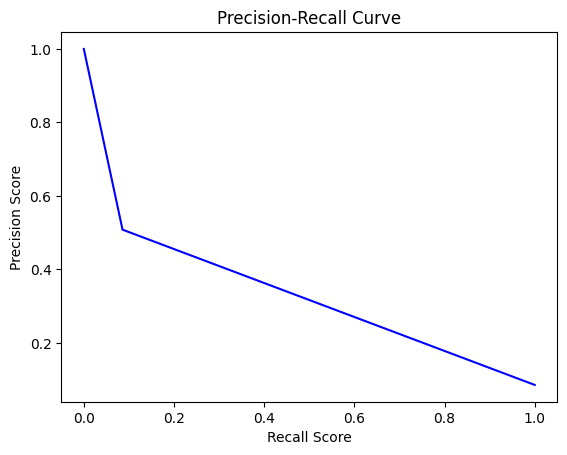

In [ ]:
# define precision recall curve before setting decision threhold
decisiontree_precision, decisiontree_recall, decisiontree_thresholds = precision_recall_curve(y_test,ypred_decisiontree)

# calculate the precision and recall score
print("Precision score:", decisiontree_precision[1])
print("Recall score:",  decisiontree_recall[1])

# plot the precision-recall curve
plt.plot(decisiontree_recall,  decisiontree_precision, color='blue')
plt.xlabel('Recall Score')
plt.ylabel('Precision Score')
plt.title('Precision-Recall Curve')
plt.show()

### Find the minimun cost and optimal decision threshold

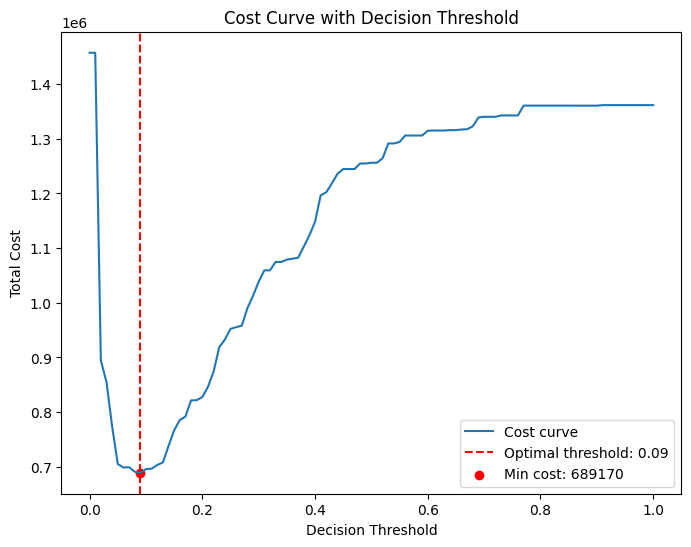

In [ ]:
# find the cost for different threshold
threshold = np.linspace(0, 1, 101)
costs = [calculate_cost(t, ypred_decisiontree_prob, y_test, cost_fp=10, cost_fn=100) for t in threshold]

# find the optimal threshold and corresponding cost
decisiontree_optimal_threshold = threshold[np.argmin(costs)]
decisiontree_min_cost = np.min(costs)

# plot the cost curve with the optimal decision threshold and corresponding cost
plt.figure(figsize=(8, 6))
plt.plot(threshold, costs, label='Cost curve')
plt.axvline(decisiontree_optimal_threshold, linestyle='--', color='r', label=f'Optimal threshold: {decisiontree_optimal_threshold:.2f}')
plt.scatter(decisiontree_optimal_threshold, decisiontree_min_cost, color='r', label=f'Min cost: {decisiontree_min_cost}')
plt.xlabel('Decision Threshold')
plt.ylabel('Total Cost')
plt.title('Cost Curve with Decision Threshold')
plt.legend()
plt.show()

In [ ]:
# use the optimal threshold to find predicted probabilities
ypred_decisiontree_prob_1_withCost= [1 if i >= decisiontree_optimal_threshold else 0 for i in ypred_decisiontree_prob]

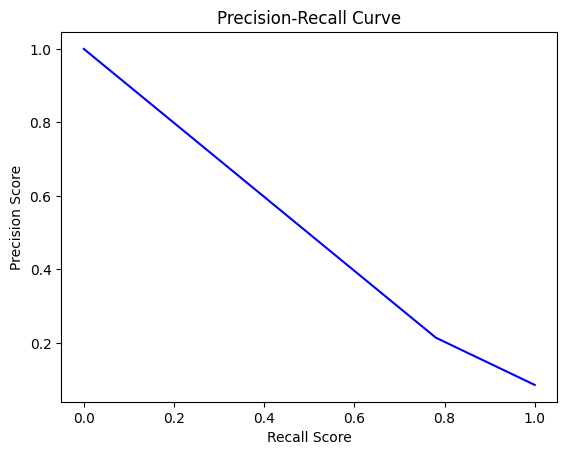

Precision score: 0.2138734136481567
Recall score: 0.7809355952118675
MAE: 0.2640017570832418
Confusion Matrix:
 [[106651  39087]
 [  2983  10634]]


In [ ]:
decisiontree_precision_withCost, decisiontree_recall_withCost, decisiontree_thresholds_withCost = precision_recall_curve(y_test,ypred_decisiontree_prob_1_withCost)

# plot the new precision-recall curve
plt.plot(decisiontree_recall_withCost, decisiontree_precision_withCost, color='blue')
plt.xlabel('Recall Score')
plt.ylabel('Precision Score')
plt.title('Precision-Recall Curve')
plt.show()

# calculate the new precision and recall score, MAE, and confusion matrix
decisiontree_mae_withCost = mean_absolute_error(y_test,ypred_decisiontree_prob_1_withCost)
decisiontree_confusion_matrix_withCost = confusion_matrix(y_test,ypred_decisiontree_prob_1_withCost)
print("Precision score:", decisiontree_precision_withCost[1])
print("Recall score:", decisiontree_recall_withCost[1])
print("MAE:",decisiontree_mae_withCost)
print("Confusion Matrix:\n", decisiontree_confusion_matrix_withCost)

In [ ]:
decisiontree_tn_withCost, decisiontree_fp_withCost, decisiontree_fn_withCost, decisiontree_tp_withCost = confusion_matrix(y_test, ypred_decisiontree_prob_1_withCost).ravel()
print("True negative :", decisiontree_tn_withCost)
print("False Positive :", decisiontree_fp_withCost)
print("False Negative :", decisiontree_fn_withCost)
print("True Positive :", decisiontree_tp_withCost)

True negative : 106651
False Positive : 39087
False Negative : 2983
True Positive : 10634


## Logistic Regression Model

### Building the model

In [ ]:
# define hyper-parameters
LM_try_grid = [{
    'C': [2**i for i in np.arange(-1, 2, 0.5)],  # Inverse of regularization strength
    'solver': ['saga'],  # Algorithm to use in the optimization problem
    'penalty': ['l1']  # Specify the norm used in the penalization
}]


# define the model using GridSearchCV with scoring='recall'
LM = GridSearchCV(LogisticRegression(max_iter=2000), param_grid=LM_try_grid, cv=10, scoring='recall')
LM.fit(X_train, y_train)

# find the best parameters and the best score
LM_best_params_ = LM.best_params_
LM_best_score_ = LM.best_score_
print("Best Hyperparameters for Logistic Regression model: ",LM_best_params_)
print("Best Score for Logistic Regression model: ",LM_best_score_)

### Train the model with the best hyperparameters

In [ ]:
# build model using the best hyperparameters 
logistic_model = LM.best_estimator_
logistic_model.fit(X_train, y_train)

LogisticRegression(C=1.4142135623730951, max_iter=2000, penalty='l1',
                   solver='saga')

In [ ]:
# make prediction 
ypred_logistic = logistic_model.predict(X_test)
# calculate the probability of predictions
ypred_logistic_prob = logistic_model.predict_proba(X_test)[:,1]

In [ ]:
# calculate accuracy, confusion matrix and MAE for test set before setting decision threhold
logistic_accuracy_score = accuracy_score(y_test,ypred_logistic)
logistic_confusion_matrix = confusion_matrix(y_test,ypred_logistic)
logistic_mean_absolute_error = mean_absolute_error( y_test,ypred_logistic)

print("Accuracy:", logistic_accuracy_score)
print("Confusion Matrix:\n", logistic_confusion_matrix)
print("MAE:",logistic_mean_absolute_error)

Accuracy: 0.9162373317435913
Confusion Matrix:
 [[144303   1435]
 [ 11913   1704]]
MAE: 0.08376266825640864


In [ ]:
logistic_tn, logistic_fp, logistic_fn, logistic_tp = confusion_matrix(y_test, ypred_logistic).ravel()
print("True negative :", logistic_tn)
print("False Positive :", logistic_fp)
print("False Negative :", logistic_fn)
print("True Positive :", logistic_tp)

True negative : 144303
False Positive : 1435
False Negative : 11913
True Positive : 1704


Precision score: 0.5428480407773176
Recall score: 0.12513769552764925


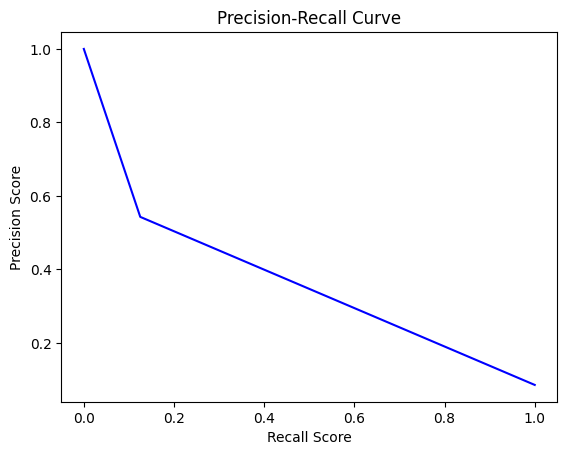

In [ ]:
# define precision recall curve before setting decision threhold
logistic_precision, logistic_recall, logistic_thresholds = precision_recall_curve(y_test,ypred_logistic)

# calculate the precision and recall score
print("Precision score:", logistic_precision[1])
print("Recall score:",  logistic_recall[1])

# plot the precision-recall curve
plt.plot(logistic_recall,  logistic_precision, color='blue')
plt.xlabel('Recall Score')
plt.ylabel('Precision Score')
plt.title('Precision-Recall Curve')
plt.show()

### Find the minimun cost and optimal decision threshold

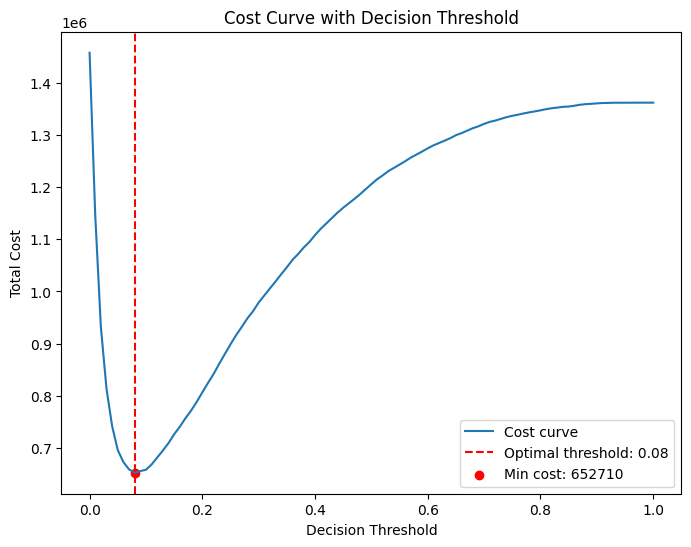

In [ ]:
# find the cost for different threshold
threshold = np.linspace(0, 1, 101)
costs = [calculate_cost(t, ypred_logistic_prob, y_test, cost_fp=10, cost_fn=100) for t in threshold]

# find the optimal threshold and corresponding cost
logistic_optimal_threshold = threshold[np.argmin(costs)]
logistic_min_cost = np.min(costs)

# plot the cost curve with the optimal decision threshold and corresponding cost
plt.figure(figsize=(8, 6))
plt.plot(threshold, costs, label='Cost curve')
plt.axvline(logistic_optimal_threshold, linestyle='--', color='r', label=f'Optimal threshold: {logistic_optimal_threshold:.2f}')
plt.scatter(logistic_optimal_threshold, logistic_min_cost, color='r', label=f'Min cost: {logistic_min_cost}')
plt.xlabel('Decision Threshold')
plt.ylabel('Total Cost')
plt.title('Cost Curve with Decision Threshold')
plt.legend()
plt.show()

In [ ]:
# use the optimal threshold to find predicted probabilities
ypred_logistic_prob_1_withCost = [1 if i >= logistic_optimal_threshold else 0 for i in ypred_logistic_prob]

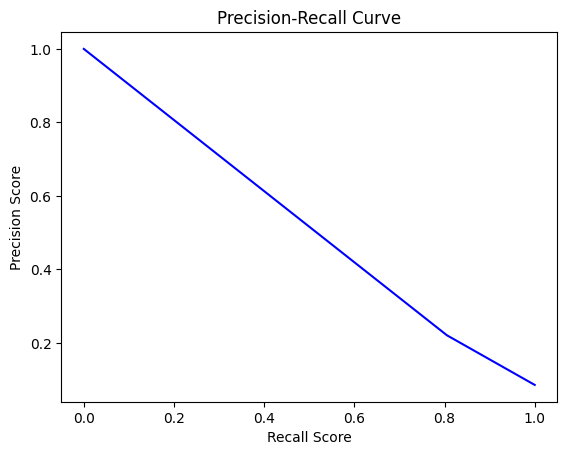

Precision score: 0.22052406137510808
Recall score: 0.8053168833076302
MAE: 0.25987261146496815
Confusion Matrix:
 [[106977  38761]
 [  2651  10966]]


In [ ]:
logistic_precision_withCost, logistic_recall_withCost, logistic_thresholds_withCost = precision_recall_curve(y_test,ypred_logistic_prob_1_withCost)

# plot the new precision-recall curve
plt.plot(logistic_recall_withCost, logistic_precision_withCost, color='blue')
plt.xlabel('Recall Score')
plt.ylabel('Precision Score')
plt.title('Precision-Recall Curve')
plt.show()

# calculate the new precision and recall score, MAE, and confusion matrix
logistic_mae_withCost = mean_absolute_error(y_test,ypred_logistic_prob_1_withCost)
logistic_confusion_matrix_withCost = confusion_matrix(y_test,ypred_logistic_prob_1_withCost)
print("Precision score:", logistic_precision_withCost[1])
print("Recall score:", logistic_recall_withCost[1])
print("MAE:",logistic_mae_withCost)
print("Confusion Matrix:\n", logistic_confusion_matrix_withCost)

In [ ]:
logistic_tn_withCost, logistic_fp_withCost, logistic_fn_withCost, logistic_tp_withCost = confusion_matrix(y_test, ypred_logistic_prob_1_withCost).ravel()
print("True negative :", logistic_tn_withCost)
print("False Positive :", logistic_fp_withCost)
print("False Negative :", logistic_fn_withCost)
print("True Positive :", logistic_tp_withCost)

True negative : 106977
False Positive : 38761
False Negative : 2651
True Positive : 10966


## Naive bayes Model¶

### Building the model

In [ ]:
# build model 
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# make prediction 
ypred_naivebayes = naive_bayes_model.predict(X_test)
# calculate the probability of predictions
ypred_naivebayes_prob = naive_bayes_model.predict_proba(X_test)[:,1]

In [ ]:
# calculate accuracy, confusion matrix and MAE for test set before setting decision threhold
naivebayes_accuracy_score = accuracy_score(y_test,ypred_naivebayes)
naivebayes_confusion_matrix = confusion_matrix(y_test,ypred_naivebayes)
naivebayes_mean_absolute_error = mean_absolute_error( y_test,ypred_naivebayes)

print("Accuracy:", naivebayes_accuracy_score)
print("Confusion Matrix:\n", naivebayes_confusion_matrix)
print("MAE:", naivebayes_mean_absolute_error)

Accuracy: 0.8234507859809859
Confusion Matrix:
 [[123304  22434]
 [  5700   7917]]
MAE: 0.17654921401901416


In [ ]:
naivebayes_tn, naivebayes_fp, naivebayes_fn, naivebayes_tp = confusion_matrix(y_test, ypred_naivebayes).ravel()
print("True negative :", naivebayes_tn)
print("False Positive :", naivebayes_fp)
print("False Negative :", naivebayes_fn)
print("True Positive :", naivebayes_tp)

True negative : 123304
False Positive : 22434
False Negative : 5700
True Positive : 7917


Precision score: 0.26084807749332806
Recall score: 0.5814055959462436


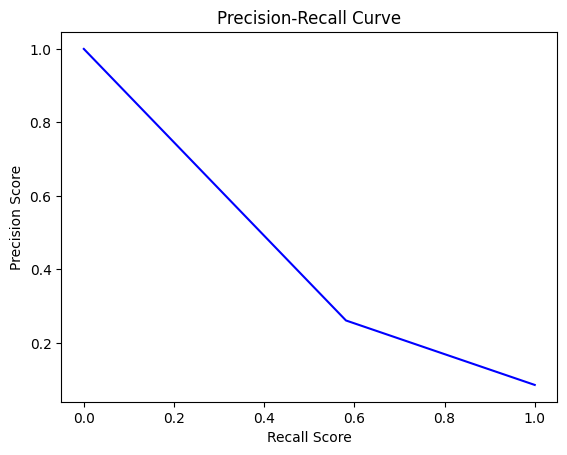

In [ ]:
# define precision recall curve before setting decision threhold
naivebayes_precision, naivebayes_recall, naivebayes_thresholds = precision_recall_curve(y_test,ypred_naivebayes)

# calculate the precision and naivebayes_precision score
print("Precision score:", naivebayes_precision[1])
print("Recall score:",  naivebayes_recall[1])

# plot the precision-recall curve
plt.plot(naivebayes_recall,  naivebayes_precision, color='blue')
plt.xlabel('Recall Score')
plt.ylabel('Precision Score')
plt.title('Precision-Recall Curve')
plt.show()

### Find the minimun cost and optimal decision threshold

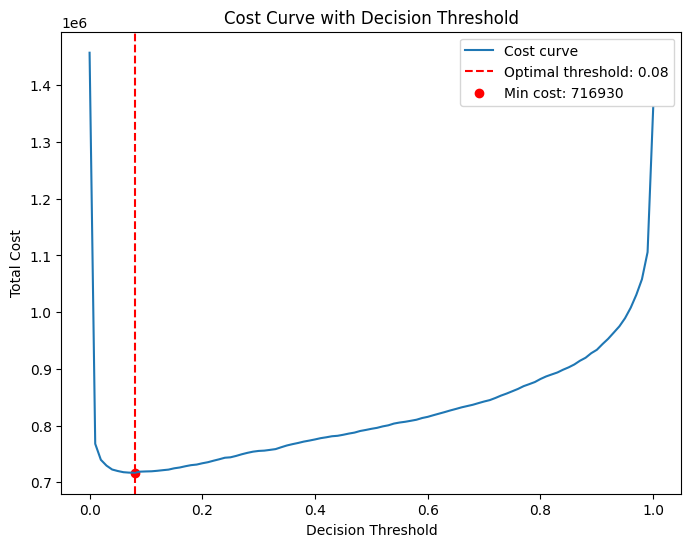

In [ ]:
# find the cost for different threshold
threshold = np.linspace(0, 1, 101)
costs = [calculate_cost(t, ypred_naivebayes_prob, y_test, cost_fp=10, cost_fn=100) for t in threshold]

# find the optimal threshold and corresponding cost
naivebayes_optimal_threshold = threshold[np.argmin(costs)]
naivebayes_min_cost = np.min(costs)

# plot the cost curve with the optimal decision threshold and corresponding cost
plt.figure(figsize=(8, 6))
plt.plot(threshold, costs, label='Cost curve')
plt.axvline(naivebayes_optimal_threshold, linestyle='--', color='r', label=f'Optimal threshold: {naivebayes_optimal_threshold:.2f}')
plt.scatter(naivebayes_optimal_threshold, naivebayes_min_cost, color='r', label=f'Min cost: {naivebayes_min_cost}')
plt.xlabel('Decision Threshold')
plt.ylabel('Total Cost')
plt.title('Cost Curve with Decision Threshold')
plt.legend()
plt.show()

In [ ]:
# use the optimal threshold to find predicted probabilities
ypred_naivebayes_prob_1_withCost= [1 if i >= naivebayes_optimal_threshold else 0 for i in ypred_naivebayes_prob]

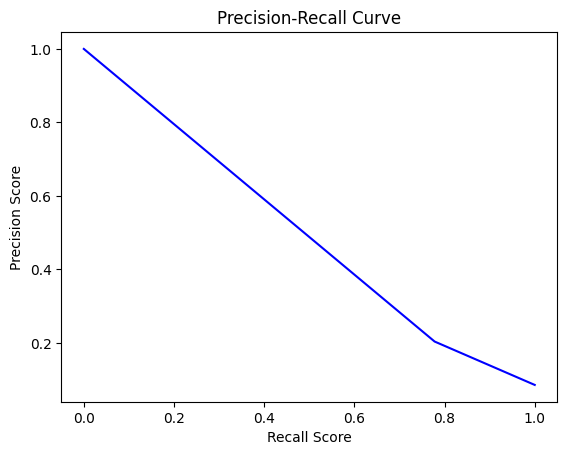

Precision score: 0.20350769348982845
Recall score: 0.7779980906220166
MAE: 0.2791628753412193
Confusion Matrix:
 [[104275  41463]
 [  3023  10594]]


In [ ]:
naivebayes_precision_withCost, naivebayes_recall_withCost, naivebayes_thresholds_withCost = precision_recall_curve(y_test,ypred_naivebayes_prob_1_withCost)

# plot the new precision-recall curve
plt.plot(naivebayes_recall_withCost, naivebayes_precision_withCost, color='blue')
plt.xlabel('Recall Score')
plt.ylabel('Precision Score')
plt.title('Precision-Recall Curve')
plt.show()

# calculate the new precision and recall score, MAE, and confusion matrix
naivebayes_mae_withCost = mean_absolute_error(y_test,ypred_naivebayes_prob_1_withCost)
naivebayes_confusion_matrix_withCost = confusion_matrix(y_test,ypred_naivebayes_prob_1_withCost)
print("Precision score:", naivebayes_precision_withCost[1])
print("Recall score:", naivebayes_recall_withCost[1])
print("MAE:",naivebayes_mae_withCost)
print("Confusion Matrix:\n", naivebayes_confusion_matrix_withCost)

In [ ]:
naivebayes_tn_withCost, naivebayes_fp_withCost, naivebayes_fn_withCost, naivebayes_tp_withCost = confusion_matrix(y_test, ypred_naivebayes_prob_1_withCost).ravel()
print("True negative :", naivebayes_tn_withCost)
print("False Positive :", naivebayes_fp_withCost)
print("False Negative :", naivebayes_fn_withCost)
print("True Positive :", naivebayes_tp_withCost)

True negative : 104275
False Positive : 41463
False Negative : 3023
True Positive : 10594


## KNN Model

### Building the model considering recall

In [ ]:
# define hyper-parameters
KNN_try_grid = [{'n_neighbors':range(1, 10)}]

# define the model using GridSearchCV with scoring='recall'
KNN = GridSearchCV(KNeighborsClassifier(), param_grid=KNN_try_grid, cv=10,scoring='recall')
KNN.fit(X_train, y_train)

# find the best parameters and the best score
KNN_best_params_ = KNN.best_params_
KNN_best_score_ = KNN.best_score_
KNN_best_estimator_ = KNN.best_estimator_

print("Best Hyperparameters for KNN model: ",KNN_best_params_)
print("Best Score for KNN model: ",KNN_best_score_)

Best Hyperparameters for KNN model:  {'n_neighbors': 1}
Best Score for KNN model:  0.18426878182029247


### Building the model considering the accuracy 

In [ ]:
# define hyper-parameters
KNN_try_grid = [{'n_neighbors':range(1, 10)}]

# define the model using GridSearchCV with scoring='recall'
KNN2 = GridSearchCV(KNeighborsClassifier(), param_grid=KNN_try_grid, cv=10)
KNN2.fit(X_train, y_train)

# find the best parameters and the best score
KNN2_best_params_ = KNN2.best_params_
KNN2_best_score_ = KNN2.best_score_

print("Best Hyperparameters for KNN model: ",KNN2_best_params_)
print("Best Score for KNN model: ",KNN2_best_score_)

Best Hyperparameters for KNN model:  {'n_neighbors': 8}
Best Score for KNN model:  0.9135011228797267


### Train the model with the best hyperparameters



In [ ]:
# build model using the best hyperparameters 
knn_model2 = KNN2.best_estimator_
knn_model2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
# make prediction 
ypred_knn2 = knn_model2.predict(X_test)
# calculate the probability of predictions
ypred_knn2_prob = knn_model2.predict_proba(X_test)[:,1]

In [ ]:
# calculate accuracy, confusion matrix and MAE for test set before setting decision threhold
knn2_accuracy_score = accuracy_score(y_test,ypred_knn2)
knn2_confusion_matrix = confusion_matrix(y_test,ypred_knn2)
knn2_mean_absolute_error = mean_absolute_error( y_test,ypred_knn2)

print("Accuracy:", knn2_accuracy_score)
print("Confusion Matrix:\n", knn2_confusion_matrix)
print("MAE:", knn2_mean_absolute_error)

Accuracy: 0.9144739732044805
Confusion Matrix:
 [[145268    470]
 [ 13159    458]]
MAE: 0.08552602679551943


In [ ]:
knn2_tn, knn2_fp, knn2_fn, knn2_tp = confusion_matrix(y_test, ypred_knn2).ravel()
print("True negative :", knn2_tn)
print("False Positive :", knn2_fp)
print("False Negative :", knn2_fn)
print("True Positive :", knn2_tp)

True negative : 145268
False Positive : 470
False Negative : 13159
True Positive : 458


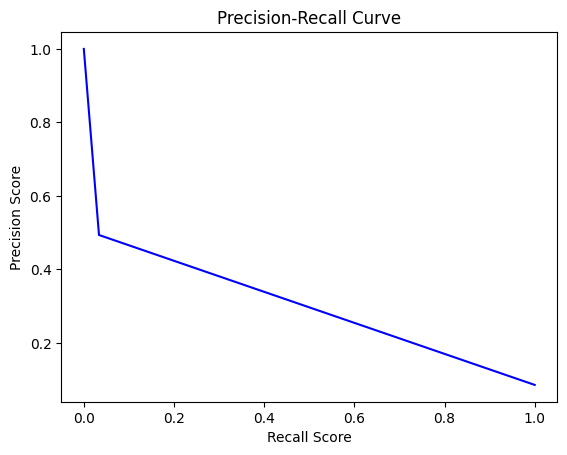

Precision score: 0.49353448275862066
Recall score: 0.033634427553793055


In [ ]:
knn2_precision, knn2_recall, knn2_thresholds = precision_recall_curve(y_test,ypred_knn2)

# plot the new precision-recall curve
plt.plot(knn2_recall, knn2_precision, color='blue')
plt.xlabel('Recall Score')
plt.ylabel('Precision Score')
plt.title('Precision-Recall Curve')
plt.show()

# calculate the new precision and recall score
print("Precision score:", knn2_precision[1])
print("Recall score:", knn2_recall[1])

### Find the minimun cost and optimal decision threshold

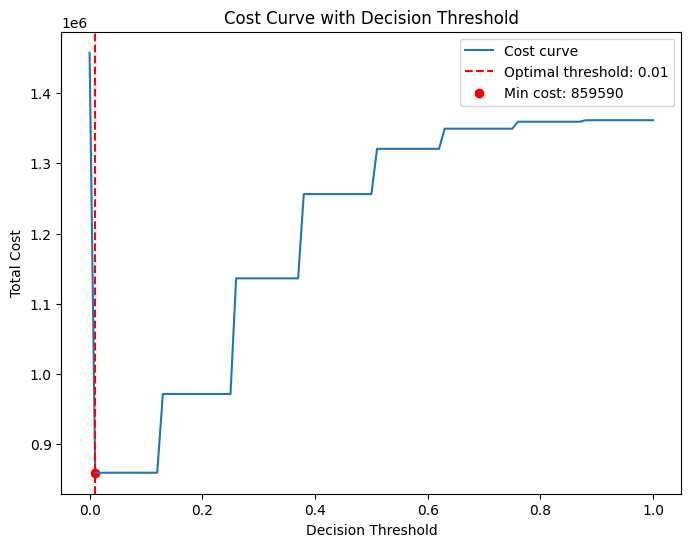

In [ ]:
# find the cost for different threshold
threshold = np.linspace(0, 1, 101)
costs = [calculate_cost(t, ypred_knn2_prob, y_test, cost_fp=10, cost_fn=100) for t in threshold]

# find the optimal threshold and corresponding cost
knn2_optimal_threshold = threshold[np.argmin(costs)]
knn2_min_cost = np.min(costs)

# plot the cost curve with the optimal decision threshold and corresponding cost
plt.figure(figsize=(8, 6))
plt.plot(threshold, costs, label='Cost curve')
plt.axvline(knn2_optimal_threshold, linestyle='--', color='r', label=f'Optimal threshold: {knn2_optimal_threshold:.2f}')
plt.scatter(knn2_optimal_threshold, knn2_min_cost, color='r', label=f'Min cost: {knn2_min_cost}')
plt.xlabel('Decision Threshold')
plt.ylabel('Total Cost')
plt.title('Cost Curve with Decision Threshold')
plt.legend()
plt.show()

In [ ]:
# use the optimal threshold to find predicted probabilities
ypred_knn2_prob_1_withCost= [1 if i >= knn2_optimal_threshold else 0 for i in ypred_knn2_prob]

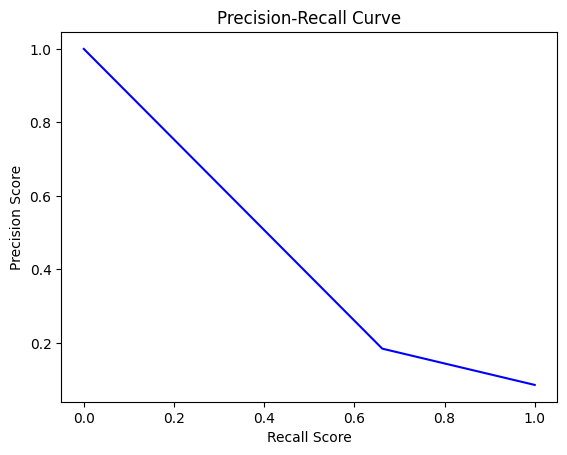

Precision score: 0.1841943922177716
Recall score: 0.6618932217081589
MAE: 0.27939506134103104
Confusion Matrix:
 [[105819  39919]
 [  4604   9013]]


In [ ]:
knn2_precision_withCost, knn2_recall_withCost, knn2_thresholds_withCost = precision_recall_curve(y_test,ypred_knn2_prob_1_withCost)

# plot the new precision-recall curve
plt.plot(knn2_recall_withCost, knn2_precision_withCost, color='blue')
plt.xlabel('Recall Score')
plt.ylabel('Precision Score')
plt.title('Precision-Recall Curve')
plt.show()

# calculate the new precision and recall score, MAE, and confusion matrix
knn2_mae_withCost = mean_absolute_error(y_test,ypred_knn2_prob_1_withCost)
knn2_confusion_matrix_withCost = confusion_matrix(y_test,ypred_knn2_prob_1_withCost)
print("Precision score:", knn2_precision_withCost[1])
print("Recall score:", knn2_recall_withCost[1])
print("MAE:",knn2_mae_withCost)
print("Confusion Matrix:\n", knn2_confusion_matrix_withCost)

In [ ]:
knn2_tn_withCost, knn2_fp_withCost, knn2_fn_withCost, knn2_tp_withCost = confusion_matrix(y_test, ypred_knn2_prob_1_withCost).ravel()
print("True negative :", knn2_tn_withCost)
print("False Positive :", knn2_fp_withCost)
print("False Negative :", knn2_fn_withCost)
print("True Positive :", knn2_tp_withCost)

True negative : 105819
False Positive : 39919
False Negative : 4604
True Positive : 9013


# Evaluation

In [ ]:
decisiontree_evaluation = [decisiontree_accuracy_score, decisiontree_confusion_matrix, decisiontree_mean_absolute_error,
                          decisiontree_tn, decisiontree_fn, decisiontree_fp, decisiontree_tp, 
                           decisiontree_precision[1], decisiontree_recall[1], 
                           decisiontree_optimal_threshold, decisiontree_min_cost,
                           decisiontree_confusion_matrix_withCost, decisiontree_mae_withCost,
                           decisiontree_tn_withCost, decisiontree_fn_withCost, decisiontree_fp_withCost, decisiontree_tp_withCost,
                          decisiontree_precision_withCost[1], decisiontree_recall_withCost[1],
                           ]

logistic_evaluation = [logistic_accuracy_score, logistic_confusion_matrix, logistic_mean_absolute_error,
                          logistic_tn, logistic_fn, logistic_fp, logistic_tp, 
                           logistic_precision[1], logistic_recall[1], 
                       logistic_optimal_threshold, logistic_min_cost,
                       logistic_confusion_matrix_withCost, logistic_mae_withCost,
                       logistic_tn_withCost, logistic_fn_withCost, logistic_fp_withCost, logistic_tp_withCost,
                          logistic_precision_withCost[1], logistic_recall_withCost[1],
                    ]

naivebayes_evaluation = [naivebayes_accuracy_score, naivebayes_confusion_matrix, naivebayes_mean_absolute_error,
                         naivebayes_tn, naivebayes_fn, naivebayes_fp, naivebayes_tp,
                         naivebayes_precision[1], naivebayes_recall[1], 
                         naivebayes_optimal_threshold, naivebayes_min_cost,
                         naivebayes_confusion_matrix_withCost, naivebayes_mae_withCost,
                         naivebayes_tn_withCost, naivebayes_fn_withCost, naivebayes_fp_withCost, naivebayes_tp_withCost,
                         naivebayes_precision_withCost[1], naivebayes_recall_withCost[1]]

knn2_evaluation = [knn2_accuracy_score, knn2_confusion_matrix, knn2_mean_absolute_error,
                         knn2_tn, knn2_fn, knn2_fp, knn2_tp,
                         knn2_precision[1], knn2_recall[1], 
                         knn2_optimal_threshold, knn2_min_cost,
                         knn2_confusion_matrix_withCost, knn2_mae_withCost,
                         knn2_tn_withCost, knn2_fn_withCost, knn2_fp_withCost, knn2_tp_withCost,
                         knn2_precision_withCost[1], knn2_recall_withCost[1]]

evaluation_tool = ["Accuracy", "Confusion Matrix", "MAE",
                   "True Negative", "False Negative", "False Positive", "True Positive", 
                   "Precision", "Recall", 
                   "Optimal Threshold", "Min Cost",
                   "Confusion Matrix with cost", "MAE with cost",
                   "True Negative with cost", "False Negative with cost", "False Positive with cost", "True Positive with cost", 
                   "Precision with cost", "Recall with cost"]

evaluation_table = pd.DataFrame({"Decision Tree": decisiontree_evaluation, "Logistic Regression": logistic_evaluation, "Naive Bayes": naivebayes_evaluation, 
                                  "K-nearest Neighbour 2": knn2_evaluation}, index=evaluation_tool)